In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error, log_loss, accuracy_score
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from matplotlib import offsetbox
import seaborn as sns



pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
sns.__version__

'0.9.0'

In [3]:
pd.__version__

'0.24.2'

In [4]:
df_orig = pd.read_csv('IDEAs-TenantInfo-and-usage_shuffled.csv', nrows=20000)

In [5]:
df_orig.shape

(20000, 227)

In [9]:
data = pd.read_csv('encoded_data.csv', nrows=20000)

In [10]:
data.shape

(20000, 1088)

In [11]:
data['AR_exchange_06'].describe()

count    20000.000000
mean         0.731259
std          0.993085
min          0.000000
25%          0.350000
50%          0.750000
75%          1.005556
max         71.350000
Name: AR_exchange_06, dtype: float64

In [12]:
data.loc[data['AR_exchange_06'] < 0.35, 'target'] = 'AR_exchange_06 < 0.35'
# data.loc[(data['AR_exchange_06'] >=0.35) & (data['AR_exchange_06'] < 0.75), 'target'] = 'AR_exchange_06: 0.35-0.75'
data.loc[data['AR_exchange_06'] >= 0.35, 'target'] = 'AR_exchange_06 >= 0.35'

In [13]:
data.shape

(20000, 1089)

In [14]:
X = data.drop(columns=['target','AR_exchange_06'])

In [15]:
X = X.to_numpy()
# y = y.to_numpy()

n_samples, n_features = X.shape
n_neighbors = 30

In [16]:
X.shape

(20000, 1087)

In [17]:
X[1]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
       -9.22337204e+18, -9.22337204e+18, -9.22337204e+18])

In [18]:
np.any(np.isnan(X))

False

In [19]:
sc = StandardScaler()  
X = sc.fit_transform(X)

In [20]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=300)
tsne_results = tsne.fit_transform(X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 20000 samples in 1.879s...
[t-SNE] Computed neighbors for 20000 samples in 557.272s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for s

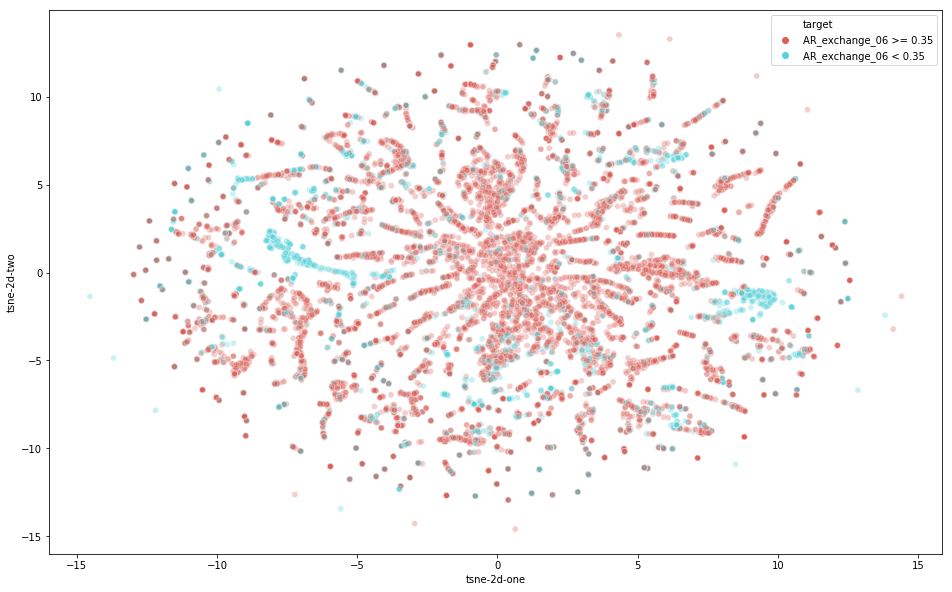

In [21]:
data['tsne-2d-one'] = tsne_results[:,0]
data['tsne-2d-two'] = tsne_results[:,1]
# data['target'] = df['target']

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=data,
    legend="full",
    alpha=0.3
)
plt.savefig('1per-clustering-tsne-exo.png')


In [22]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)
data['pca-one'] = pca_result[:,0]
data['pca-two'] = pca_result[:,1] 
data['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.06487369 0.02309207 0.01866974]


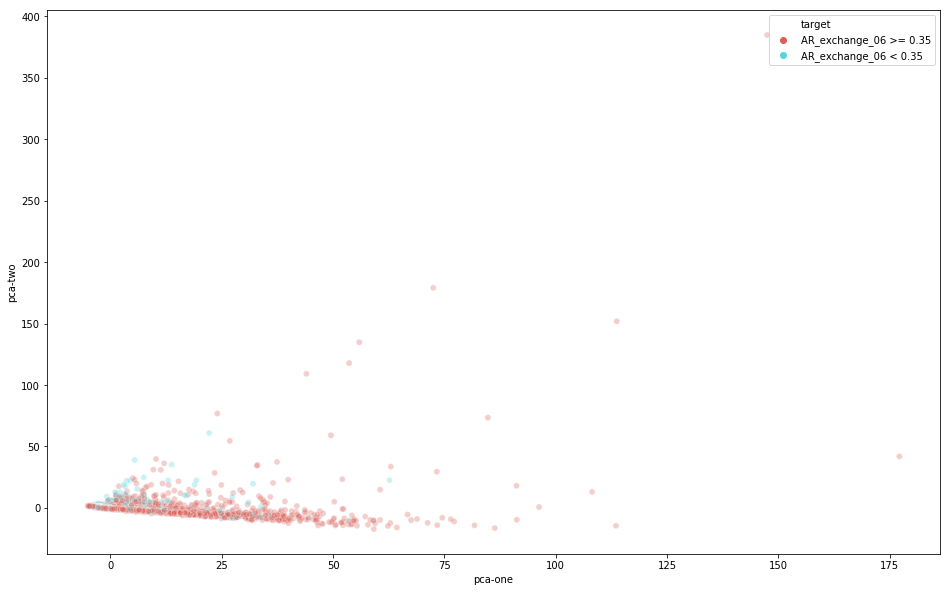

In [23]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=data,
    legend="full",
    alpha=0.3
)
plt.savefig('1per-clustering-pca-exo.png')

# Preprocess data

1. encode categorical data
2. transfer datetime data
3. convert nan to zero, inf to one
4. encode boolean type data
5. split dataset
6. normalize data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1865326 entries, 0 to 1865325
Columns: 227 entries, TenantId to AR_eslt_06
dtypes: bool(40), float64(92), int64(62), object(33)
memory usage: 2.7+ GB


In [11]:
df_obj = df.iloc[:10000,:].select_dtypes(include='object')

In [12]:
df_obj.columns

Index(['TenantId', 'CreatedDate', 'CreateDateOfFirstSubscription',
       'CountryCode', 'Languange', 'DataCenterInstance', 'DataCenterModel',
       'SignupLocationInfo_Country', 'SignupLocationInfo_CountryCode',
       'SignupLocationInfo_Region', 'TopParents_AreaName',
       'TopParents_BigAreaName', 'TopParents_CountryCode',
       'TopParents_Industry', 'TopParents_RegionName',
       'TopParents_SegmentGroup', 'TopParents_SubRegionName',
       'TopParents_VerticalName', 'FirstPaidEXOStartDate',
       'FirstPaidSPOStartDate', 'FirstPaidOD4BStartDate',
       'FirstPaidSfBStartDate', 'FirstPaidYammerStartDate',
       'FirstPaidTeamsStartDate', 'FirstPaidProPlusStartDate',
       'FirstPaidAADPStartDate', 'FirstPaidAIPStartDate',
       'FirstPaidAATPStartDate', 'FirstPaidIntuneStartDate',
       'FirstPaidMCASStartDate', 'FirstPaidO365E5SkuStartDate',
       'FirstPaidM365E5SkuStartDate', 'FirstPaidEMSE5SkuStartDate'],
      dtype='object')

In [ ]:
# df_yun = df.iloc[3:5,:]

# df_yun.to_csv('hackathon.csv', index=False)

In [13]:
df_bool = df.iloc[:10000,:].select_dtypes(include='bool')

In [14]:
df_num = df.iloc[:10000,:].select_dtypes(exclude=['object', 'bool'])

In [15]:
df_tenantid = df_obj.loc[:,'TenantId']

In [16]:
cols_datetime = ['CreatedDate', 'CreateDateOfFirstSubscription','FirstPaidEXOStartDate',
       'FirstPaidSPOStartDate', 'FirstPaidOD4BStartDate',
       'FirstPaidSfBStartDate', 'FirstPaidYammerStartDate',
       'FirstPaidTeamsStartDate', 'FirstPaidProPlusStartDate',
       'FirstPaidAADPStartDate', 'FirstPaidAIPStartDate',
       'FirstPaidAATPStartDate', 'FirstPaidIntuneStartDate',
       'FirstPaidMCASStartDate', 'FirstPaidO365E5SkuStartDate',
       'FirstPaidM365E5SkuStartDate', 'FirstPaidEMSE5SkuStartDate']
df_datetime = df_obj.loc[:, cols_datetime]

In [17]:
cols_cat = ['CountryCode', 'Languange', 'DataCenterInstance', 'DataCenterModel',
       'SignupLocationInfo_Country', 'SignupLocationInfo_CountryCode',
       'SignupLocationInfo_Region', 'TopParents_AreaName',
       'TopParents_BigAreaName', 'TopParents_CountryCode',
       'TopParents_Industry', 'TopParents_RegionName',
       'TopParents_SegmentGroup', 'TopParents_SubRegionName',
       'TopParents_VerticalName']
df_cat = df_obj.loc[:, cols_cat]

In [18]:
# encode datetime columns
def encoder_datatime(df):
    cols = df.columns
    for i in cols:
        df[i] = pd.to_datetime(df[i], utc=True, errors='coerce').astype(int,errors='ignore')
    return df

In [19]:
# encode categorical columns
def encoder_cat(df):
    cols = df.columns
    for i in cols:
        df = pd.concat([df,pd.get_dummies(df[i],prefix=[i], dummy_na=True)],axis=1)
        df.drop([i],axis=1, inplace=True)
    return df

In [20]:
df_cat = encoder_cat(df_cat)
df_cat.shape

(10000, 1733)

In [21]:
df_datetime = encoder_datatime(df_datetime)
df_datetime.shape

(10000, 17)

In [22]:
df_num.columns.tolist()

['AllupSeats',
 'EXOSubscriptionsCount',
 'OD4BSubscriptionsCount',
 'SfBSubscriptionsCount',
 'TeamsSubscriptionsCount',
 'PaidCount',
 'ProjectSubscriptionsCount',
 'SPOSubscriptionsCount',
 'ActivatedSubscriptionTotalCount',
 'VisioSubscriptionsCount',
 'TrialSubscriptionsCount',
 'NonTrialSubscriptionsCount',
 'EXOEnabledUsers',
 'SPOEnabledUsers',
 'OD4BEnabledUsers',
 'SFBEnabledUsers',
 'TeamEnabledUsers',
 'YammerEnabledUsers',
 'PPDEnabledUsers',
 'KaizalaEnabledUsers',
 'AADPEnabledUsers',
 'AIPEnabledUsers',
 'AATPEnabledUsers',
 'IntuneEnabledUsers',
 'MCASEnabledUsers',
 'WDATPEnabledUsers',
 'AudioConferenceEnabledUsers',
 'PhoneSystemEnabledUsers',
 'EdiscoveryEnabledUsers',
 'ComplianceEnabledUsers ',
 'ThreatIntelligenceEnabledUsers',
 'CustomerLockboxEnabledUsers',
 'OATPEnabledUsers',
 'AADPP2EnabledUsers',
 'AIPP2EnabledUsers',
 'WindowsEnabledUsers ',
 'O365CASEnabledUsers',
 'CASDiscoveryEnabledUsers',
 'PAMEnabledUsers',
 'O365EnabledUsers',
 'EMSEnabledUsers',
 

In [23]:
# outputs labels
# df_num_ar = df_num_fake.loc[:, 'AR_exchange_04':'AR_eslt_06']
# df_num_others = df_num_fake.loc[:, :'AU_officeclient']
df_num.replace([np.nan, np.inf], [0, 1], inplace=True)

In [24]:
df_num.head()

,AllupSeats,EXOSubscriptionsCount,OD4BSubscriptionsCount,SfBSubscriptionsCount,TeamsSubscriptionsCount,PaidCount,ProjectSubscriptionsCount,SPOSubscriptionsCount,ActivatedSubscriptionTotalCount,VisioSubscriptionsCount,TrialSubscriptionsCount,NonTrialSubscriptionsCount,EXOEnabledUsers,SPOEnabledUsers,OD4BEnabledUsers,SFBEnabledUsers,TeamEnabledUsers,YammerEnabledUsers,PPDEnabledUsers,KaizalaEnabledUsers,AADPEnabledUsers,AIPEnabledUsers,AATPEnabledUsers,IntuneEnabledUsers,MCASEnabledUsers,WDATPEnabledUsers,AudioConferenceEnabledUsers,PhoneSystemEnabledUsers,EdiscoveryEnabledUsers,ComplianceEnabledUsers,ThreatIntelligenceEnabledUsers,CustomerLockboxEnabledUsers,OATPEnabledUsers,AADPP2EnabledUsers,AIPP2EnabledUsers,WindowsEnabledUsers,O365CASEnabledUsers,CASDiscoveryEnabledUsers,PAMEnabledUsers,O365EnabledUsers,EMSEnabledUsers,M365EnabledUsers,O365E5EnabledUsers,EMSE5EnabledUsers,M365E5EnabledUsers,TotalUsers,PaidEXOSeats,PaidSPOSeats,PaidOD4BSeats,PaidYammerSeats,PaidTeamsSeats,PaidSFBSeats,PaidKaizalaSeats,PaidProplusSeats,PaidAADPSeats,PaidAIPSeats,PaidAATPSeats,PaidIntuneSeats,PaidMCASSeats,PaidWDATPSeats,PaidAudioConferenceSeats,PaidPhoneSystemSeats,PaidOATPSeats,PaidAADPP2Seats,PaidAIPP2Seats,PaidWindowsSeats,PaidO365CASSeats,PaidCASDiscoverySeats,PaidPAMSeats,PaidPowerBISeats,PaidPowerBIPremiumSeats,PaidPowerBIProSeats,PaidEMSSeats,PaidM365Seats,PaidOfficeSeats,Age,AU_exchange_04,AU_sharepoint_04,AU_skype_04,AU_teams_04,AU_od4b_04,AU_onenote_04,AU_word_04,AU_excel_04,AU_powerpoint_04,AU_outlook_04,AU_oatp_04,AU_odsp_04,AU_eslt_04,AU_officeclient_04,AU_exchange_05,AU_sharepoint_05,AU_skype_05,AU_teams_05,AU_od4b_05,AU_onenote_05,AU_word_05,AU_excel_05,AU_powerpoint_05,AU_outlook_05,AU_oatp_05,AU_odsp_05,AU_eslt_05,AU_officeclient_05,AU_exchange,AU_sharepoint,AU_skype,AU_teams,AU_od4b,AU_onenote,AU_word,AU_excel,AU_powerpoint,AU_outlook,AU_oatp,AU_odsp,AU_eslt,AU_officeclient,AR_exchange_04,AR_sharepoint_04,AR_skype_04,AR_teams_04,AR_od4b_04,AR_onenote_04,AR_word_04,AR_excel_04,AR_powerpoint_04,AR_outlook_04,AR_eslt_04,AR_officelient_04,AR_exchange_05,AR_sharepoint_05,AR_skype_05,AR_teams_05,AR_od4b_05,AR_onenote_05,AR_word_05,AR_excel_05,AR_powerpoint_05,AR_outlook_05,AR_officelient_05,AR_eslt_05,AR_exchange_06,AR_sharepoint_06,AR_skype_06,AR_teams_06,AR_od4b_06,AR_onenote_06,AR_word_06,AR_excel_06,AR_powerpoint_06,AR_outlook_06,AR_officelient_06,AR_eslt_06
0,2,1,1,1,1,2,0,1,1,0,0,1,2,2,2,2,2,2,0,2,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,0,3,2,2,2,2,2,2,2,0,0,0,0,0,0,0,2.0,2,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,888.0,2.727273,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.727273,0.000000,2.818182,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.0,0.000000,2.818182,0.045455,3.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,3.00,0.00,1.363636,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.363636,0.0,1.409091,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,1.409091,1.500000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.500000
1,34,1,0,0,0,34,0,0,1,0,0,1,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33,0,33,0,0,0,38,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,602.0,27.545455,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.636364,0.0,0.000000,27.545455,1.636364,28.954545,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.909091,0.0,0.000000,28.954545,1.909091,32.50,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,1.55,0.0,0.0,32.50,1.55,0.810160,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.810160,1.0,0.851604,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.851604,0.955882,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.955882
2,3,1,1,1,1,3,0,1,2,0,0,2,3,3,3,3,3,3,3,3,0,0,0,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0,0,3,0,3,0,0,0,7,3,3,3,3,3,3,3,3,0,0,0,0,0,0,3.0,3,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1388.0,4.090909,1.727273,0.000000,0.

In [25]:
labels = df_num.loc[:, 'AR_exchange_04':'AR_eslt_06']
labels.shape

(10000, 36)

In [26]:
df_num_others = df_num.loc[:, :'Age']
df_num_others.shape

(10000, 76)

In [33]:
# concatenate the input data
data = pd.concat([df_cat, df_num_others, df_datetime], axis=1)
data.shape

(10000, 1826)

In [34]:
df_new = pd.concat([df_tenantid ,df_cat, df_num_others, df_datetime, labels], axis=1)
df_new.shape

(10000, 1863)

In [35]:
df_new['Age'].describe()

count    10000.000000
mean       710.658300
std        483.221458
min          7.000000
25%        349.000000
50%        622.000000
75%        958.000000
max       3786.000000
Name: Age, dtype: float64

In [72]:
df_test_ = df_new.loc[(df_new['Age'] <= 360)].reset_index(drop=True)

In [73]:
df_train = df_new.loc[(df_new['Age'] > 360)].reset_index(drop=True)

In [74]:
df_dev = df_test_.sample(frac=0.5, random_state=0)
df_test = df_test_.loc[~df_test_.TenantId.isin(df_dev.TenantId)]

In [76]:
# use info data as inputs (exclude datetime data and tenantId)
Xtrain = df_train.loc[:, df_cat.columns[0]:df_dat.columns[-1]]
Xdev = df_dev.loc[:, df_cat.columns[0]:df_num_others.columns[-1]]
Xtest = df_test.loc[:, df_cat.columns[0]:df_num_others.columns[-1]]

In [75]:
# use exo as single output
ytrain = df_train.loc[:, 'AR_exchange_06']
ydev = df_dev.loc[:, 'AR_exchange_06']
ytest_ = df_test.loc[:, 'AR_exchange_06']

In [61]:
input_features_name = pd.Series(Xtrain.columns)

In [77]:
Xtrain = Xtrain.to_numpy()
Xdev = Xdev.to_numpy()
Xtest_= Xtest_.to_numpy()
ytrain = ytrain.to_numpy()
ydev = ydev.to_numpy()
ytest_ = ytest_.to_numpy()

In [42]:
# Xtest, Xdev, ytest, ydev = train_test_split(Xtest_, ytest_, test_size=0.5, random_state=1)

In [78]:
np.any(np.isnan(Xtrain))

False

In [79]:
sc = StandardScaler()  
Xtrain = sc.fit_transform(Xtrain)  
Xtest = sc.transform(Xtest)
Xdev = sc.transform(Xdev)

C:\Users\SaimloginJobvm05\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [129]:
# model = KNeighborsRegressor(n_neighbors=5)
# model = LinearRegression()
model = RandomForestRegressor(n_estimators=5, random_state=0)

model.fit(Xtrain, ytrain)

pred_train = model.predict(Xtrain)
print(mean_squared_error(ytrain, pred_train))

pred_dev = model.predict(Xdev)
print(mean_squared_error(ydev, pred_dev))

0.0826903399634722
0.6421492784490953


In [130]:
type(pred_dev)

numpy.ndarray

In [133]:
pred_dev.tolist()

[1.04033580187928,
 0.6278787878787877,
 0.6483333333333333,
 0.35,
 0.4691666666666666,
 0.0,
 0.8555000000000001,
 0.8038333333333332,
 0.9712154471544714,
 0.9816785714285714,
 1.036578947368421,
 0.8351111111111109,
 0.7224999999999999,
 0.7783333333333332,
 0.0,
 0.24,
 0.7830155319119111,
 0.7482997076023391,
 0.5149999999999999,
 4.795813872722838,
 0.7525,
 0.0,
 0.7383397660818714,
 0.5913333333333333,
 0.7439568283453732,
 0.7249999999999999,
 0.5791666666666667,
 0.5353116939301923,
 0.0,
 0.495,
 0.7055555555555555,
 0.4953333333333333,
 0.7496111111111111,
 0.615,
 0.8872699275362319,
 0.46416666666666667,
 0.645,
 1.3325,
 0.8268589872426638,
 0.3093787878787879,
 0.7475841946597759,
 0.9566666666666667,
 0.5454669603814339,
 0.6900000000000001,
 0.0,
 0.9452380952380952,
 1.0141674641148326,
 0.8501428571428571,
 0.45166666666666666,
 0.48166666666666663,
 0.8087500000000001,
 1.78,
 0.38,
 0.5016666666666667,
 0.7318333333333332,
 0.7558162909887048,
 0.045,
 0.91709090

## Below is the prepared dataset for hackathon display

In [188]:
cols = ['TenantId','CountryCode','AllupSeats','PaidEXOSeats','PaidSPOSeats','PaidOD4BSeats','PaidTeamsSeats',
        'PaidSFBSeats','PaidOfficeSeats','AR_exchange_06','AR_sharepoint_06','AR_skype_06','AR_teams_06',
        'AR_od4b_06','AR_officelient_06']

In [189]:
df_dev_hackathon = df.loc[df.TenantId.isin(df_dev.TenantId), cols]
df_dev_hackathon.replace([np.nan, np.inf], [0, 1], inplace=True)

In [190]:
df_dev_hackathon['Industry'] = df.loc[df.TenantId.isin(df_dev.TenantId), 'TopParents_Industry']

In [191]:
df_dev_hackathon['Industry'].describe()

count              609
unique              23
top       Smart Spaces
freq               103
Name: Industry, dtype: object

In [192]:
df_dev_hackathon.shape

(1303, 16)

In [193]:
# set(df_dev_hackathon['Industry'])

In [194]:
labels = ['AR_exchange_06','AR_sharepoint_06','AR_skype_06','AR_teams_06','AR_od4b_06','AR_officelient_06']

def RFR_pred_outputs(Xtrain, Xdev, labels):
#     pred = []
#     cols_name = []
    
    for l in labels:
        ytrain = df_train.loc[:, l]
        ydev = df_dev.loc[:, l]
        l_ = l[3:-3]
        col_name = 'RFR_pred_{}'.format(l_)
        col_delta = 'RFR_delta_{}'.format(l_)
#         cols_name.append(col_name)
        
        ytrain = ytrain.to_numpy()
        ydev = ydev.to_numpy()
        
        model = RandomForestRegressor(n_estimators=5, random_state=0)
        model.fit(Xtrain, ytrain)

#         pred_train = model.predict(Xtrain)
#         print(mean_squared_error(ytrain, pred_train))

        pred_dev = model.predict(Xdev)
#         print(pred_dev.dtype)
#         print(mean_squared_error(ydev, pred_dev))
#         pred.append(pred_dev)
        df_dev_hackathon[col_name] = pred_dev
        df_dev_hackathon[col_delta] = pred_dev - df_dev_hackathon[l]
        
    
#     df_pred = pd.DataFrame(np.array(pred).T, columns=cols_name)
    
    return df_dev_hackathon


In [195]:
df_pred = RFR_pred_outputs(Xtrain, Xdev, labels)

In [196]:
df_pred.head()

,TenantId,CountryCode,AllupSeats,PaidEXOSeats,PaidSPOSeats,PaidOD4BSeats,PaidTeamsSeats,PaidSFBSeats,PaidOfficeSeats,AR_exchange_06,AR_sharepoint_06,AR_skype_06,AR_teams_06,AR_od4b_06,AR_officelient_06,Industry,RFR_pred_exchange,RFR_delta_exchange,RFR_pred_sharepoint,RFR_delta_sharepoint,RFR_pred_skype,RFR_delta_skype,RFR_pred_teams,RFR_delta_teams,RFR_pred_od4b,RFR_delta_od4b,RFR_pred_officelient,RFR_delta_officelient
5,0898B902-614C-4659-ACF2-17A89AEB08D6,US,12,11,12,12,11,11,0.0,0.954545,0.000000,0.000000,0.000000,0.020833,1.0,NaN,1.040336,0.085790,0.047722,0.047722,0.010003,0.010003,0.321672,0.321672,0.145034,0.124201,1.0,0.0
7,94A2F079-A05E-40DE-B09A-140AD249F7A8,US,42,38,38,41,38,38,0.0,1.557895,0.289474,0.055263,0.434211,0.185366,1.0,Partner Professional Services,0.627879,-0.930016,2.850000,2.560526,0.032381,-0.022882,0.200012,-0.234198,0.402934,0.217568,1.0,0.0
23,EDA29C30-2151-4CC8-8681-B1029A6FBC44,US,9,8,0,1,0,0,0.0,0.237500,1.000000,0.000000,0.000000,0.050000,1.0,Media & Entertainment,0.648333,0.410833,0.000000,-1.000000,0.000002,0.000002,0.000000,0.000000,0.000000,-0.050000,0.8,-0.2
33,D800138B-B5A4-466B-9F6C-9F0BDEFD1250,ZA,17,17,13,13,13,13,0.0,0.979412,0.003846,0.000000,0.038462,0.023077,1.0,NaN,0.350000,-0.629412,0.110000,0.106154,0.085242,0.085242,0.000000,-0.038462,0.621500,0.598423,1.0,0.0
36,710D1298-6DCE-49F2-B304-56EF2238E99A,TW,20,20,0,0,0,0,0.0,0.707500,0.000000,0.000000,0.000000,0.000000,1.0,NaN,0.469167,-0.238333,0.000010,0.000010,0.000003,0.000003,0.018337,0.018337,0.292500,0.292500,1.0,0.0


In [272]:
for acr, name in [('EXO', 'exchange'), ('SPO', 'sharepoint'), 
                  ('OD4B', 'od4b'), ('Teams', 'teams'), 
                  ('SFB', 'skype'), ('Office', 'officelient')]:
    def f(row):
        if row['Paid{}Seats'.format(acr)] <= 0:
            val = -1
        else:
            if row['RFR_delta_{}'.format(name)] > 0.1 and row['AR_{}_06'.format(name)] < 1:
                val = 1
            else:
                val = 0
        return val
    
    vals = []
    for i, row in df_pred.iterrows():
        vals.append(f(row))
        
    df_pred['Rec_{}'.format(acr)] = vals

In [273]:
df_pred.head()

,TenantId,CountryCode,AllupSeats,PaidEXOSeats,PaidSPOSeats,PaidOD4BSeats,PaidTeamsSeats,PaidSFBSeats,PaidOfficeSeats,AR_exchange_06,AR_sharepoint_06,AR_skype_06,AR_teams_06,AR_od4b_06,AR_officelient_06,Industry,RFR_pred_exchange,RFR_delta_exchange,RFR_pred_sharepoint,RFR_delta_sharepoint,RFR_pred_skype,RFR_delta_skype,RFR_pred_teams,RFR_delta_teams,RFR_pred_od4b,RFR_delta_od4b,RFR_pred_officelient,RFR_delta_officelient,Rec_EXO,Rec_SPO,Rec_OD4B,Rec_Teams,Rec_SFB,Rec_Office
5,0898B902-614C-4659-ACF2-17A89AEB08D6,US,12,11,12,12,11,11,0.0,0.954545,0.000000,0.000000,0.000000,0.020833,1.0,NaN,1.040336,0.085790,0.047722,0.047722,0.010003,0.010003,0.321672,0.321672,0.145034,0.124201,1.0,0.0,0,0,1,1,0,-1
7,94A2F079-A05E-40DE-B09A-140AD249F7A8,US,42,38,38,41,38,38,0.0,1.557895,0.289474,0.055263,0.434211,0.185366,1.0,Partner Professional Services,0.627879,-0.930016,2.850000,2.560526,0.032381,-0.022882,0.200012,-0.234198,0.402934,0.217568,1.0,0.0,0,1,1,0,0,-1
23,EDA29C30-2151-4CC8-8681-B1029A6FBC44,US,9,8,0,1,0,0,0.0,0.237500,1.000000,0.000000,0.000000,0.050000,1.0,Media & Entertainment,0.648333,0.410833,0.000000,-1.000000,0.000002,0.000002,0.000000,0.000000,0.000000,-0.050000,0.8,-0.2,1,-1,0,-1,-1,-1
33,D800138B-B5A4-466B-9F6C-9F0BDEFD1250,ZA,17,17,13,13,13,13,0.0,0.979412,0.003846,0.000000,0.038462,0.023077,1.0,NaN,0.350000,-0.629412,0.110000,0.106154,0.085242,0.085242,0.000000,-0.038462,0.621500,0.598423,1.0,0.0,0,1,1,0,0,-1
36,710D1298-6DCE-49F2-B304-56EF2238E99A,TW,20,20,0,0,0,0,0.0,0.707500,0.000000,0.000000,0.000000,0.000000,1.0,NaN,0.469167,-0.238333,0.000010,0.000010,0.000003,0.000003,0.018337,0.018337,0.292500,0.292500,1.0,0.0,0,-1,-1,-1,-1,-1


In [276]:
df_pred.to_csv('hackathon.csv', index=False)

In [259]:
def f(row):
    if row['PaidEXOSeats'] <= 0:
        val = -1
    else:
        if row['RFR_delta_exchange'] > 0.1 and row['AR_exchange_06'] < 1:
            val = 1
        else:
            val = 0
    return val

In [265]:
vals = []
for i, row in df_pred.iterrows():
    vals.append(f(row))

In [266]:
df_pred['Rec_EXO'] = vals

In [267]:
# df_pred['Rec_EXO'] = df_pred.apply(lambda x: f(x))

In [269]:
df_pred.head(20)

,TenantId,CountryCode,AllupSeats,PaidEXOSeats,PaidSPOSeats,PaidOD4BSeats,PaidTeamsSeats,PaidSFBSeats,PaidOfficeSeats,AR_exchange_06,AR_sharepoint_06,AR_skype_06,AR_teams_06,AR_od4b_06,AR_officelient_06,Industry,RFR_pred_exchange,RFR_delta_exchange,RFR_pred_sharepoint,RFR_delta_sharepoint,RFR_pred_skype,RFR_delta_skype,RFR_pred_teams,RFR_delta_teams,RFR_pred_od4b,RFR_delta_od4b,RFR_pred_officelient,RFR_delta_officelient,Rec_EXO
5,0898B902-614C-4659-ACF2-17A89AEB08D6,US,12,11,12,12,11,11,0.0,0.954545,0.000000,0.000000,0.000000,0.020833,1.000000,NaN,1.040336,0.085790,0.047722,0.047722,0.010003,0.010003,0.321672,0.321672,0.145034,0.124201,1.000,0.000000,0
7,94A2F079-A05E-40DE-B09A-140AD249F7A8,US,42,38,38,41,38,38,0.0,1.557895,0.289474,0.055263,0.434211,0.185366,1.000000,Partner Professional Services,0.627879,-0.930016,2.850000,2.560526,0.032381,-0.022882,0.200012,-0.234198,0.402934,0.217568,1.000,0.000000,0
23,EDA29C30-2151-4CC8-8681-B1029A6FBC44,US,9,8,0,1,0,0,0.0,0.237500,1.000000,0.000000,0.000000,0.050000,1.000000,Media & Entertainment,0.648333,0.410833,0.000000,-1.000000,0.000002,0.000002,0.000000,0.000000,0.000000,-0.050000,0.800,-0.200000,1
33,D800138B-B5A4-466B-9F6C-9F0BDEFD1250,ZA,17,17,13,13,13,13,0.0,0.979412,0.003846,0.000000,0.038462,0.023077,1.000000,NaN,0.350000,-0.629412,0.110000,0.106154,0.085242,0.085242,0.000000,-0.038462,0.621500,0.598423,1.000,0.000000,0
36,710D1298-6DCE-49F2-B304-56EF2238E99A,TW,20,20,0,0,0,0,0.0,0.707500,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,0.469167,-0.238333,0.000010,0.000010,0.000003,0.000003,0.018337,0.018337,0.292500,0.292500,1.000,0.000000,0
41,E37D1B95-58AD-4016-9611-0940EE538CAF,RU,61,0,0,60,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000001,0.000001,0.000003,0.000003,0.010370,0.010370,1.000,0.000000,-1
43,C21069C6-0DA2-41D3-BEFD-B2793A1199B9,BR,166,82,83,84,82,82,164.0,1.154268,0.000000,0.007317,0.000000,0.017262,0.185061,Smart Spaces,0.855500,-0.298768,0.000017,0.000017,0.000008,-0.007309,0.000000,0.000000,0.008466,-0.008796,0.800,0.614939,0
45,1A538077-82EE-4B33-847A-EEFE5AA7E8CC,US,6,4,0,2,0,0,0.0,0.662500,0.000000,0.000000,0.000000,0.000000,0.000000,Smart Spaces,0.803833,0.141333,0.065010,0.065010,0.000009,0.000009,0.000000,0.000000,0.066126,0.066126,1.000,1.000000,1
59,1C808616-D916-43D3-A90F-575EF8C82B51,US,2,2,2,2,2,2,0.0,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.971215,0.846215,0.106667,0.106667,0.017500,0.017500,0.067152,0.067152,0.584048,0.584048,0.800,0.800000,1
62,4428DDF6-C766-4776-AE7A-7347A6818C9B,BE,13,13,13,13,13,13,0.0,0.946154,0.000000,0.000000,0.000000,0.030769,1.000000,Smart Spaces,0.981679,0.035525,0.000005,0.000005,0.032396,0.032396,0.004074,0.004074,0.213356,0.182587,1.000,0.000000,0


In [166]:
df_fake = df_pred.loc[:10,:]

In [114]:
col

'RF_predEXO'

In [ ]:
df_dev_hackathon['rec_exo'] = 

In [97]:
df_dev_hackathon.head()

,TenantId,CountryCode,AllupSeats,PaidEXOSeats,PaidSPOSeats,PaidOD4BSeats,PaidTeamsSeats,PaidSFBSeats,PaidOfficeSeats,AR_exchange_06,AR_sharepoint_06,AR_skype_06,AR_teams_06,AR_od4b_06,AR_officelient_06,pred_exo
5,0898B902-614C-4659-ACF2-17A89AEB08D6,US,12,11,12,12,11,11,0.0,0.954545,0.000000,0.000000,0.000000,0.020833,1.0,1.040336
7,94A2F079-A05E-40DE-B09A-140AD249F7A8,US,42,38,38,41,38,38,0.0,1.557895,0.289474,0.055263,0.434211,0.185366,1.0,0.627879
23,EDA29C30-2151-4CC8-8681-B1029A6FBC44,US,9,8,0,1,0,0,0.0,0.237500,1.000000,0.000000,0.000000,0.050000,1.0,0.648333
33,D800138B-B5A4-466B-9F6C-9F0BDEFD1250,ZA,17,17,13,13,13,13,0.0,0.979412,0.003846,0.000000,0.038462,0.023077,1.0,0.350000
36,710D1298-6DCE-49F2-B304-56EF2238E99A,TW,20,20,0,0,0,0,0.0,0.707500,0.000000,0.000000,0.000000,0.000000,1.0,0.469167


In [51]:
RF:
0.0826903399634722
0.9670469937350931

LR:
0.43443792549719956
2.2951311923889164e+25

KNN:



0.34888637664345984


In [84]:
df_fake.head()

['CountryCode']_AE  ['CountryCode']_AG  ['CountryCode']_AR  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   ['CountryCode']_AT  ['CountryCode']_AU  ['CountryCode']_AW  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   ['CountryCode']_BA  ['CountryCode']_BD  ['CountryCode']_BE  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   ['CountryCode']_BG  ['CountryCode']_BH  ['CountryCode']_BM  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   ['CountryCode']_BO  ['CountryCode']_BR  ['CountryCode']_BS  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   ['CountryCode']_BY  ['CountryCode']_CA  ['CountryCode']_CH  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   1                   0   
3                   0                   1                   0   
4                   0                   0                   0   

   ['CountryCode']_CL  ['CountryCode']_CN  ['CountryCode']_CO  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   ['CountryCode']_CR  ['CountryCode']_CW  ['CountryCode']_CY  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   ['CountryCode']_CZ  ['CountryCode']_DE  ['CountryCode']_DK  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   ['CountryCode']_DO  ['CountryCode']_DZ  ['CountryCode']_EC  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   ['CountryCode']_EE  ['CountryCode']_EG  ['CountryCode']_ES  \
0                   0       

In [ ]:
def encoder_cat(df, col):
    df = pd.concat([df,pd.get_dummies(df[col],prefix=[col], dummy_na=True)],axis=1)
    df.drop([col],axis=1, inplace=True)
    return df

for col in col_cat:
    df = encoder_cat(df, col)

In [ ]:
df_fake_obj = df_fake_obj.drop(['TenantId','OrgNameEnteredInCommerce','TopParents_TopParentName',
                                'UsGovCloudOfferingType','SignupLocationInfo_Region','TopParents_BigAreaName',
                                'TopParents_CountryCode','TopParents_RegionName', 'SignupLocationInfo_CountryCode'],
                               axis=1)

df_fake_cat = df_fake_obj.loc[:, ['CountryCode', 'Languange','DataCenterInstance','DataCenterModel',
                           'SignupLocationInfo_Country ','TopParents_AreaName','TopParents_Industry',
                           'TopParents_SegmentGroup', 'TopParents_SubRegionName','TopParents_VerticalName']]


df_fake_datetime = df_fake_obj.drop(columns=list(df_fake_cat.columns), axis=1)

df_fake_datetime.head()

pd.to_datetime(df_fake_datetime['CreatedDate'], utc=True).astype(int)

# df_fake_datetime['CreatedDate']


        

df_fake_datetime = encoder(df_fake_datetime)

df_fake_datetime.head()